In [ ]:
!pip install konlpy

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

     |████████████████████████████████| 19.4 MB 5.2 MB/s 
     |████████████████████████████████| 448 kB 48.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datas = pd.read_excel('/content/drive/MyDrive/test.xlsx')
datas.sample(n=10)

,Location,Category,Doctor,Title,Question,Answer
7546,https://kin.naver.com/qna/detail.naver?d1id=7&...,외과,류성열,코로나3차백신예약을변경해도되나요?,질문 코로나3차백신예약을변경해도되나요? 3차부스터샷백신접종을 취소하고 다시변경해도되...,안녕하세요. 대한의사협회·네이버 지식iN 상담의사 류성열 입니다.예. 급한 일정이 ...
12223,https://kin.naver.com/qna/detail.naver?d1id=7&...,내과,한재혁,당뇨 혈당수치 관련,질문 당뇨 혈당수치 관련 새해에 복 많이 받으세요!.혈당 측정결과에 대한 질문입니다...,안녕하세요. 하이닥-네이버 지식iN 상담의 한재혁 입니다.1. 공복당 장애가 있는 ...
7428,https://kin.naver.com/qna/detail.naver?d1id=7&...,외과,정현화,제가 지금 오른쪽 엄지 발가락 살 안,질문 제가 지금 오른쪽 엄지 발가락 살 안에 염증이 생긴 것 같은데 이건 얼음 찜질...,안녕하세요. 대한의사협회·네이버 지식iN 상담의사 정현화 입니다.얼음찜질로 문제가 ...
5396,https://kin.naver.com/qna/detail.naver?d1id=7&...,이비인후과,김준호,환절기비염에 좋은 게 뭐가 있을까요?,"질문 환절기비염에 좋은 게 뭐가 있을까요? 어렸을 때부터 비염 증상이 있긴 했는데,...",안녕하세요. 하이닥-네이버 지식iN 상담의 김준호 입니다.?환절기와 같이 급격한 온...
9020,https://kin.naver.com/qna/detail.naver?d1id=7&...,신경외과,한재혁,위염 장염 몸살 어지러움 관련,질문 위염 장염 몸살 어지러움 관련 몇일전부터 입맛도 없고 약간 속불편한게 생겼는데...,안녕하세요. 하이닥-네이버 지식iN 상담의 한재혁 입니다.체력과 컨디션 고갈로 인해...
8330,https://kin.naver.com/qna/detail.naver?d1id=7&...,신경외과,윤영수,팔에 전기가 흐르듯 찌릿찌릿해요,질문 팔에 전기가 흐르듯 찌릿찌릿해요 몇일 전 일어 나다 머리가 쿵하고 부딧혀서 거...,안녕하세요. 대한의사협회·네이버 지식iN 상담의사 윤영수 입니다. 신경외과에서 목에...
11880,https://kin.naver.com/qna/detail.naver?d1id=7&...,대장/항문 외과,이무혁,항문쪽 엉덩이 종기,질문 항문쪽 엉덩이 종기 제가 며칠전에 항문에서 조금 떨어진 곳에 종기가 났어요. ...,안녕하세요. 대한의사협회·네이버 지식iN 상담의사 이무혁 입니다.?모든 종기(농양)...
12178,https://kin.naver.com/qna/detail.naver?d1id=7&...,내과,한재혁,씻고 나왔는데 어지러움,질문 씻고 나왔는데 어지러움 제가 욕조에서 2~30분 정도 목욕을 했는데 욕조에셔 ...,안녕하세요. 하이닥-네이버 지식iN 상담의 한재혁 입니다.아마도 욕조에서 오랜 시간...
7060,https://kin.naver.com/qna/detail.naver?d1id=7&...,외과,이세라,상처부위가 노랗게 굳었어요,질문 상처부위가 노랗게 굳었어요 12월 4일 물집이 생겨서 터뜨리고 매일 과산화수소...,안녕하세요. 대한의사협회·네이버 지식iN 상담의사 이세라 입니다.?잘 낫지 않는 부...
11822,https://kin.naver.com/qna/detail.naver?d1id=7&...,대장/항문 외과,이무혁,변비에 대한 질문 드려봅니다.,질문 변비에 대한 질문 드려봅니다. 제가 변비가 있어서 음식을 아무리 많이 먹어도 ...,안녕하세요. 대한의사협회·네이버 지식iN 상담의사 이무혁 입니다.?- 음식물은 양보...


In [ ]:
print(datas['Category'])

0        피부과
1        피부과
2        피부과
3        피부과
4        피부과
        ... 
15952    신경과
15953    신경과
15954    신경과
15955    신경과
15956    신경과
Name: Category, Length: 15957, dtype: object


In [ ]:
print(datas["Category"].value_counts())

피부과         1980
이비인후과       1980
외과          1980
신경외과        1980
내과          1980
신경과         1980
정형외과        1915
대장/항문 외과    1643
흉부외과         519
Name: Category, dtype: int64


In [ ]:
datas.drop_duplicates(subset=['Question'], inplace=True)

In [ ]:
datas.loc[(datas['Category'] == "정형외과"), 'Category'] = 0  #정형외과 => 0
datas.loc[(datas['Category'] == "피부과"), 'Category'] = 1  #피부과 => 1
datas.loc[(datas['Category'] == "이비인후과"), 'Category'] = 2  #이비인후과 => 2
datas.loc[(datas['Category'] == "외과"), 'Category'] = 3  #외과 => 3
datas.loc[(datas['Category'] == "신경외과"), 'Category'] = 4  #신경외과 => 4
datas.loc[(datas['Category'] == "흉부외과"), 'Category'] = 5  #흉부외과 => 5
datas.loc[(datas['Category'] == "대장/항문 외과"), 'Category'] = 6  #대장/항문 외과 => 7
datas.loc[(datas['Category'] == "신경과"), 'Category'] = 7  #신경과 => 7
datas.loc[(datas['Category'] == "내과"), 'Category'] = 8  #내과 => 8

print(set(datas['Category']))

{0, 1, 2, 3, 4, 5, 6, 7, 8}


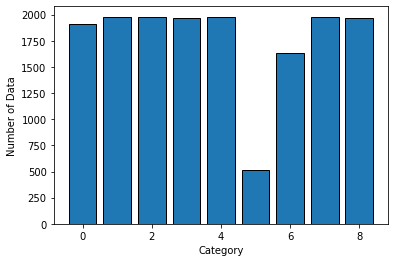

In [ ]:
plt.hist(datas['Category'], align = 'left', range = (0, 9), bins = 9, rwidth=0.8, edgecolor = 'k')
plt.xlabel('Category')
plt.ylabel('Number of Data')
plt.show()

In [ ]:
datas['Question'] = datas['Question'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
datas[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Location,Category,Doctor,Title,Question,Answer
0,https://kin.naver.com/qna/detail.naver?d1id=7&...,1,황규광,18세 입니다)피부에 이렇게 붉은 점이 있어요 태어날때 부터요 레...,질문 세 입니다피부에 이렇게 붉은 점이 있어요 태어날때 부터요 레이저로 지울수 있나...,안녕하세요. 하이닥-네이버 지식iN 피부과 상담의 황규광입니다.?사진이 흐릿해서 정...
1,https://kin.naver.com/qna/detail.naver?d1id=7&...,1,오두종,자해 흉터,질문 자해 흉터 연한 갈색의 흉터인데요튀어나온 건 없고 색소침착이 심합니다시카케어 ...,안녕하세요. 하이닥-네이버 지식iN 상담의 오두종 입니다.?튀어 나온 흉터가 아니라...
2,https://kin.naver.com/qna/detail.naver?d1id=7&...,1,이현태,발에 물집같은게 생겻는데 살짝 아프고 간지러워요,질문 발에 물집같은게 생겻는데 살짝 아프고 간지러워요 물집같은게 생겻는데 살짝 아프...,안녕하세요. 피부과전문의 이현태 입니다. 사진상 봐서는 마찰성 수포나 무좀을 의심해...
3,https://kin.naver.com/qna/detail.naver?d1id=7&...,1,이현태,얼굴에 난 점 제거 가능한가요?,질문 얼굴에 난 점 제거 가능한가요,안녕하세요. 피부과전문의 이현태 입니다. 점제거 레이저시술은 피부과 전문의 병원에서...
4,https://kin.naver.com/qna/detail.naver?d1id=7&...,1,이현태,"손가락, 손바닥 점",질문 손가락 손바닥 점 손바닥에는 생긴지가 꽤 됐고 손가락은 없었는데 오늘 보니 생...,안녕하세요. 피부과전문의 이현태 입니다. 손바닥은 점 같고 손가락에 생긴 건 점이거...


In [ ]:
datas['Question'] = datas['Question'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
datas['Question'].replace('', np.nan, inplace=True)
print(datas.isnull().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Location    0
Category    0
Doctor      0
Title       0
Question    0
Answer      0
dtype: int64


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()

questions = []
for sentence in tqdm(datas['Question']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    questions.append(stopwords_removed_sentence)

100%|██████████| 15911/15911 [04:29<00:00, 59.00it/s]


In [ ]:
print(questions[:3])

[['질문', '세', '이다', '피부', '이렇게', '붉다', '점', '있다', '태어나다', '때', '부터', '요', '레이저', '로', '지우다', '있다', '비용', '어느', '정도', '요', '세', '이다', '피부', '이렇게', '붉다', '점', '있다', '태어나다', '때', '부터', '요', '레이저', '로', '지우다', '있다', '비용', '어느', '정도', '요'], ['질문', '자해', '흉터', '연한', '갈색', '흉터', '인데', '요', '튀어나오다', '건', '없다', '색소', '침착', '심하다', '카', '케어', '밴드', '노스', '카나', '겔', '듬뿍', '함께', '사용', '효과', '볼', '수', '있다', '개월', '내', '로', '요', '생기다', '지다', '달', '반정', '되다', '흉터', '고', '노스', '카나', '겔', '꾸준하다', '바르다', '있다'], ['질문', '발', '물집', '같다', '생겻는데', '살짝', '아프다', '간지럽다', '물집', '같다', '생겻는데', '살짝', '아프다', '간지럽다', '게', '모', '죠', '걸', '을', '때', '걸리다', '적', '거리', '고', '뭔가', '계속', '커지다', '같다']]


In [ ]:
labels = []
for label in datas['Category'] :
    labels.append(str(label))

In [ ]:
print(set(labels))

{'3', '5', '0', '7', '4', '1', '6', '2', '8'}


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)

In [ ]:
print(tokenizer.word_index)

{'을': 1, '질문': 2, '있다': 3, '요': 4, '아프다': 5, '되다': 6, '같다': 7, '때': 8, '없다': 9, '통증': 10, '병원': 11, '로': 12, '수술': 13, '받다': 14, '이다': 15, '안': 16, '보다': 17, '아니다': 18, '먹다': 19, '에서': 20, '않다': 21, '제': 22, '가다': 23, '정도': 24, '증상': 25, '것': 26, '나오다': 27, '고': 28, '부터': 29, '느낌': 30, '약': 31, '그렇다': 32, '검사': 33, '머리': 34, '만': 35, '후': 36, '너무': 37, '맞다': 38, '전': 39, '생기다': 40, '일': 41, '자다': 42, 'ㅠㅠ': 43, '거': 44, '치료': 45, '계속': 46, '나다': 47, '그': 48, '들다': 49, '목': 50, '괜찮다': 51, '인가요': 52, '게': 53, '어떻다': 54, '많이': 55, '왼쪽': 56, '피': 57, '다': 58, '하고': 59, '적': 60, '부분': 61, '쪽': 62, '지금': 63, '저': 64, '인데': 65, '갑자기': 66, '심하다': 67, '못': 68, '수': 69, '오른쪽': 70, '더': 71, '항문': 72, '까지': 73, '왜': 74, '그리고': 75, '알다': 76, '모르다': 77, '오다': 78, '다리': 79, '나': 80, '끄다': 81, '때문': 82, '그냥': 83, '문제': 84, '오늘': 85, '혹시': 86, '이렇다': 87, '면': 88, '가요': 89, '중': 90, '시간': 91, '근데': 92, '처럼': 93, '두통': 94, '인': 95, '귀': 96, '다시': 97, '에는': 98, '조금': 99, '허리': 100, '서': 101, '무릎': 102, '되어

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18809
등장 빈도가 2번 이하인 희귀 단어의 수: 9869
단어 집합에서 희귀 단어의 비율: 52.46956244351109
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3751501674206987


In [ ]:
tokenizer = Tokenizer(7790) 
tokenizer.fit_on_texts(questions)
questions = tokenizer.texts_to_sequences(questions)

In [ ]:
print(questions[:3])

[[2, 313, 15, 110, 167, 535, 223, 3, 1973, 8, 29, 4, 483, 12, 3303, 3, 670, 159, 24, 4, 313, 15, 110, 167, 535, 223, 3, 1973, 8, 29, 4, 483, 12, 3303, 3, 670, 159, 24, 4], [2, 4512, 460, 3304, 1112, 460, 65, 4, 271, 259, 9, 1586, 1660, 67, 2696, 3399, 649, 4157, 3845, 2790, 5323, 849, 439, 363, 532, 69, 3, 295, 252, 12, 4, 40, 235, 129, 3846, 6, 460, 28, 4157, 3845, 2790, 829, 233, 3], [2, 221, 550, 7, 5324, 147, 5, 372, 550, 7, 5324, 147, 5, 372, 53, 601, 391, 131, 1, 8, 214, 60, 260, 28, 177, 46, 513, 7]]


In [ ]:
length = []

for question in questions:
  length.append(len(question))

In [ ]:
print(length)

[39, 44, 28, 6, 22, 32, 11, 62, 15, 25, 24, 30, 45, 16, 27, 30, 34, 19, 13, 26, 13, 28, 19, 88, 101, 31, 40, 37, 30, 38, 58, 12, 10, 39, 49, 18, 20, 16, 37, 67, 67, 25, 58, 20, 31, 19, 47, 36, 7, 26, 26, 22, 16, 36, 37, 16, 25, 21, 35, 19, 40, 23, 23, 54, 24, 28, 21, 22, 64, 36, 19, 121, 40, 42, 27, 60, 18, 20, 28, 27, 47, 13, 86, 66, 21, 56, 37, 22, 15, 23, 49, 53, 109, 30, 9, 15, 15, 28, 116, 41, 40, 20, 74, 24, 36, 46, 73, 82, 20, 12, 51, 31, 23, 44, 31, 8, 29, 47, 25, 25, 49, 9, 12, 37, 56, 46, 15, 18, 10, 11, 154, 34, 32, 21, 38, 28, 113, 77, 75, 15, 27, 13, 4, 60, 101, 6, 32, 29, 39, 45, 48, 85, 39, 33, 25, 64, 39, 31, 14, 15, 49, 19, 37, 30, 17, 20, 75, 15, 27, 45, 48, 18, 44, 6, 30, 28, 6, 25, 47, 26, 29, 81, 34, 32, 81, 54, 70, 48, 19, 42, 63, 69, 28, 31, 33, 12, 8, 125, 40, 12, 12, 39, 5, 42, 23, 22, 25, 31, 51, 63, 18, 34, 10, 19, 45, 7, 19, 36, 23, 22, 14, 40, 28, 29, 11, 72, 46, 33, 202, 70, 18, 25, 22, 56, 26, 38, 52, 120, 36, 31, 10, 102, 51, 22, 25, 14, 15, 22, 44, 40, 

In [ ]:
import csv
with open("Length.csv", 'w') as file:
  write = csv.writer(file)
  write.writerow(length)

리뷰의 최대 길이 : 894
리뷰의 평균 길이 : 55.55917289925209


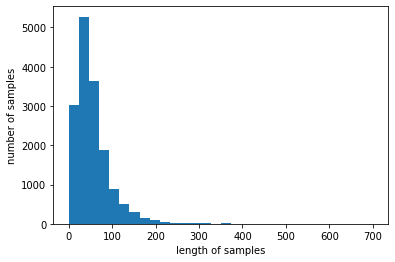

In [ ]:
print('리뷰의 최대 길이 :',max(len(question) for question in questions))
print('리뷰의 평균 길이 :',sum(map(len, questions))/len(questions))
plt.hist([len(question) for question in questions], bins=30, range=(0, 700))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 150
below_threshold_len(max_len, questions)

전체 샘플 중 길이가 150 이하인 샘플의 비율: 96.47413738922758


In [ ]:
questions = pad_sequences(questions, maxlen=150)

In [ ]:
from sklearn.model_selection import train_test_split
                                                         
x_train, x_test, y_train, y_test = train_test_split(questions, labels, test_size=0.2, random_state=100)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train).astype(float)
x_test = np.array(x_test)
y_test = np.array(y_test).astype(float)

In [ ]:
print(x_train.shape)

(12728, 150)


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, Conv1D, GlobalMaxPooling1D, Flatten, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
embedding_dim = 128

cnnmodel = Sequential()
cnnmodel.add(Embedding(7790, embedding_dim, input_length=150))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Conv1D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(9, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

cnnmodel.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = cnnmodel.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_test, y_test))

Epoch 1/10
197/199 [============================>.] - ETA: 0s - loss: 1.6350 - acc: 0.5080
Epoch 1: val_acc improved from -inf to 0.64625, saving model to best_model.h5
199/199 [==============================] - 2s 6ms/step - loss: 1.6309 - acc: 0.5086 - val_loss: 1.1187 - val_acc: 0.6462
Epoch 2/10
198/199 [============================>.] - ETA: 0s - loss: 0.9540 - acc: 0.6851
Epoch 2: val_acc improved from 0.64625 to 0.70437, saving model to best_model.h5
199/199 [==============================] - 1s 6ms/step - loss: 0.9534 - acc: 0.6855 - val_loss: 0.8794 - val_acc: 0.7044
Epoch 3/10
199/199 [==============================] - ETA: 0s - loss: 0.7683 - acc: 0.7445
Epoch 3: val_acc improved from 0.70437 to 0.72102, saving model to best_model.h5
199/199 [==============================] - 1s 6ms/step - loss: 0.7683 - acc: 0.7445 - val_loss: 0.8172 - val_acc: 0.7210
Epoch 4/10
199/199 [==============================] - ETA: 0s - loss: 0.6736 - acc: 0.7727
Epoch 4: val_acc improved from 0.

In [ ]:
pred = np.argmax(cnnmodel.predict(x_test), axis=1)
from sklearn.metrics import f1_score, recall_score, precision_score

cnnprecision = precision_score(y_test, pred, average = 'macro')
cnnrecall = recall_score(y_test, pred, average = 'macro')
cnnf1_score = f1_score(y_test, pred, average = 'macro')

print(f'cnn precision:{cnnprecision}')
print(f'cnn recall: {cnnrecall}')
print(f'cnn f1 score : {cnnf1_score}')

cnn precision:0.7367226697679309
cnn recall: 0.73657746933222
cnn f1 score : 0.7361253518256046


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
embedding_dim = 128

model = Sequential()
model.add(Embedding(7790, embedding_dim, input_length=150))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_test, y_test))

Epoch 1/10
197/199 [============================>.] - ETA: 0s - loss: 1.9882 - acc: 0.2651
Epoch 00001: val_acc improved from -inf to 0.40716, saving model to best_model.h5
199/199 [==============================] - 9s 18ms/step - loss: 1.9858 - acc: 0.2663 - val_loss: 1.6205 - val_acc: 0.4072
Epoch 2/10
197/199 [============================>.] - ETA: 0s - loss: 1.0822 - acc: 0.6262
Epoch 00002: val_acc improved from 0.40716 to 0.67986, saving model to best_model.h5
199/199 [==============================] - 3s 15ms/step - loss: 1.0793 - acc: 0.6277 - val_loss: 0.9334 - val_acc: 0.6799
Epoch 3/10
197/199 [============================>.] - ETA: 0s - loss: 0.7837 - acc: 0.7357
Epoch 00003: val_acc improved from 0.67986 to 0.70500, saving model to best_model.h5
199/199 [==============================] - 3s 15ms/step - loss: 0.7843 - acc: 0.7359 - val_loss: 0.8738 - val_acc: 0.7050
Epoch 4/10
197/199 [============================>.] - ETA: 0s - loss: 0.6526 - acc: 0.7830
Epoch 00004: val_a

In [ ]:
pred = np.argmax(model.predict(x_test), axis=1)

In [ ]:
print(len(y_test))
print(len(pred))

3183
3183


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score

gruprecision = precision_score(y_test, pred, average = 'macro')
grurecall = recall_score(y_test, pred, average = 'macro')
gruf1_score = f1_score(y_test, pred, average = 'macro')

print(f'gru precision:{gruprecision}')
print(f'gru recall: {grurecall}')
print(f'gru f1 score : {gruf1_score}')

gru precision:0.6909622939204308
gru recall: 0.7054356230795523
gru f1 score : 0.6905940260092883


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
embedding_dim = 128
model2 = Sequential()
model2.add(Embedding(7790, embedding_dim, input_length=150))
model2.add(LSTM(128, return_sequences=True))
model2.add(Dropout(rate=0.2))
model2.add(LSTM(64, return_sequences = True))
model2.add(Dropout(rate=0.2))
model2.add(LSTM(32))
model2.add(Dropout(rate=0.2))
model2.add(Dense(9, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model22.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model2.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_test, y_test))

Epoch 1/10
199/199 [==============================] - ETA: 0s - loss: 1.6445 - acc: 0.4064
Epoch 1: val_acc improved from -inf to 0.58184, saving model to best_model22.h5
199/199 [==============================] - 12s 32ms/step - loss: 1.6445 - acc: 0.4064 - val_loss: 1.2512 - val_acc: 0.5818
Epoch 2/10
197/199 [============================>.] - ETA: 0s - loss: 1.1017 - acc: 0.6380
Epoch 2: val_acc improved from 0.58184 to 0.64844, saving model to best_model22.h5
199/199 [==============================] - 5s 27ms/step - loss: 1.1010 - acc: 0.6387 - val_loss: 1.0715 - val_acc: 0.6484
Epoch 3/10
199/199 [==============================] - ETA: 0s - loss: 0.9202 - acc: 0.7014
Epoch 3: val_acc improved from 0.64844 to 0.66572, saving model to best_model22.h5
199/199 [==============================] - 5s 27ms/step - loss: 0.9202 - acc: 0.7014 - val_loss: 1.0199 - val_acc: 0.6657
Epoch 4/10
199/199 [==============================] - ETA: 0s - loss: 0.7999 - acc: 0.7469
Epoch 4: val_acc improv

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
embedding_dim = 128
model2 = Sequential()
model2.add(Embedding(7790, embedding_dim, input_length=150))
model2.add(LSTM(256))
model2.add(Dropout(rate=0.2))
model2.add(Dense(9, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model2.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_test, y_test))

Epoch 1/10
198/199 [============================>.] - ETA: 0s - loss: 1.7749 - acc: 0.3687
Epoch 00001: val_acc improved from -inf to 0.53880, saving model to best_model2.h5
199/199 [==============================] - 7s 22ms/step - loss: 1.7734 - acc: 0.3694 - val_loss: 1.3563 - val_acc: 0.5388
Epoch 2/10
199/199 [==============================] - ETA: 0s - loss: 1.1175 - acc: 0.6318
Epoch 00002: val_acc improved from 0.53880 to 0.65221, saving model to best_model2.h5
199/199 [==============================] - 4s 18ms/step - loss: 1.1175 - acc: 0.6318 - val_loss: 1.0475 - val_acc: 0.6522
Epoch 3/10
199/199 [==============================] - ETA: 0s - loss: 0.9135 - acc: 0.6997
Epoch 00003: val_acc improved from 0.65221 to 0.68426, saving model to best_model2.h5
199/199 [==============================] - 4s 19ms/step - loss: 0.9135 - acc: 0.6997 - val_loss: 0.9729 - val_acc: 0.6843
Epoch 4/10
196/199 [============================>.] - ETA: 0s - loss: 0.7744 - acc: 0.7478
Epoch 00004: va

In [ ]:
pred2 = np.argmax(model2.predict(x_test), axis=1)

lstmprecision = precision_score(y_test, pred2, average = 'macro')
lstmrecall = recall_score(y_test, pred2, average = 'macro')
lstmf1_score = f1_score(y_test, pred2, average = 'macro')

print(f'lstm precision:{lstmprecision}')
print(f'lstm recall: {lstmrecall}')
print(f'lstm f1 score : {lstmf1_score}')

lstm precision:0.6980052699380895
lstm recall: 0.664302483523845
lstm f1 score : 0.6719675590615451


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 128

model3 = Sequential()
model3.add(Embedding(7790, embedding_dim, input_length=150))
model3.add(SimpleRNN(128, return_sequences = True))
model3.add(Dropout(0.2))
model3.add(SimpleRNN(64))
model3.add(Dropout(0.2))
model3.add(Dense(9, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model11.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model3.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_test, y_test))

Epoch 1/10
199/199 [==============================] - ETA: 0s - loss: 2.2233 - acc: 0.1482
Epoch 1: val_acc improved from -inf to 0.25605, saving model to best_model11.h5
199/199 [==============================] - 41s 197ms/step - loss: 2.2233 - acc: 0.1482 - val_loss: 2.0139 - val_acc: 0.2560
Epoch 2/10
199/199 [==============================] - ETA: 0s - loss: 1.6270 - acc: 0.4254
Epoch 2: val_acc improved from 0.25605 to 0.49984, saving model to best_model11.h5
199/199 [==============================] - 39s 196ms/step - loss: 1.6270 - acc: 0.4254 - val_loss: 1.4745 - val_acc: 0.4998
Epoch 3/10
199/199 [==============================] - ETA: 0s - loss: 1.1525 - acc: 0.6143
Epoch 3: val_acc improved from 0.49984 to 0.55482, saving model to best_model11.h5
199/199 [==============================] - 39s 197ms/step - loss: 1.1525 - acc: 0.6143 - val_loss: 1.3428 - val_acc: 0.5548
Epoch 4/10
199/199 [==============================] - ETA: 0s - loss: 0.8169 - acc: 0.7374
Epoch 4: val_acc d

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 128

model3 = Sequential()
model3.add(Embedding(7790, embedding_dim, input_length=150))
model3.add(SimpleRNN(32))
model3.add(Dropout(0.2))
model3.add(Dense(9, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model3.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_test, y_test))

Epoch 1/10
199/199 [==============================] - ETA: 0s - loss: 2.0311 - acc: 0.2066
Epoch 00001: val_acc improved from -inf to 0.25071, saving model to best_model.h5
199/199 [==============================] - 21s 100ms/step - loss: 2.0311 - acc: 0.2066 - val_loss: 1.8392 - val_acc: 0.2507
Epoch 2/10
199/199 [==============================] - ETA: 0s - loss: 1.6497 - acc: 0.4041
Epoch 00002: val_acc improved from 0.25071 to 0.39020, saving model to best_model.h5
199/199 [==============================] - 20s 99ms/step - loss: 1.6497 - acc: 0.4041 - val_loss: 1.7719 - val_acc: 0.3902
Epoch 3/10
199/199 [==============================] - ETA: 0s - loss: 1.2482 - acc: 0.6023
Epoch 00003: val_acc improved from 0.39020 to 0.45963, saving model to best_model.h5
199/199 [==============================] - 20s 100ms/step - loss: 1.2482 - acc: 0.6023 - val_loss: 1.5613 - val_acc: 0.4596
Epoch 4/10
199/199 [==============================] - ETA: 0s - loss: 0.9753 - acc: 0.7048
Epoch 00004: 

In [ ]:
model3 = load_model("best_model.h5")

In [ ]:
test_loss, test_acc = model3.evaluate(x_test, y_test)

100/100 [==============================] - 1s 11ms/step - loss: 1.4670 - acc: 0.5803


In [ ]:
pred3 = np.argmax(model3.predict(x_test), axis=1)

rnnprecision = precision_score(y_test, pred3, average = 'macro')
rnnrecall = recall_score(y_test, pred3, average = 'macro')
rnnf1_score = f1_score(y_test, pred3, average = 'macro')

print(f'rnn precision:{rnnprecision}')
print(f'rnn recall: {rnnrecall}')
print(f'rnn f1 score : {rnnf1_score}')

rnn precision:0.5194280292768857
rnn recall: 0.5353743021147009
rnn f1 score : 0.5240950126456672
